In [1]:
import osmnx as ox
import networkx as nx
import geopandas
import matplotlib.pyplot as plt

In [11]:
class Graph:
    """Graph is the main data downloader using the osmnx tool to
    download data from openstreetmap. Abstract layer that can
    subscribes to the same idea of reproducible download and
    analysis of data.
    
    Should allow you to download data using all the methods available
    in osmnx
    
    There are various ways to download using the osmnx tool, Placer.download
    method will right function to download the data with. It takes the
    following parameters related to data download
    
    Parameters
    ----------
    from_bbox: bool    -> use osmnx.graph_from_bbox
    from_address: bool -> use osmnx.graph_from_address
    from_place: bool   -> use osmnx.graph_from_place
    from_point: bool   -> use osmnx.graph_from_point
    from_polygon: bool   -> use osmnx.graph_from_polygon
    """
    
    def __init__(self,
                 from_bbox=False,
                 from_place=False,
                 from_address=False,
                 from_polygon=False,
                 from_point=False,
                 custom_download=False, func=None,
                 coord_with_distance=False,
                 address_with_distance=None,
                 place_names=None
                ):
        self.G=None
        self.downloader = None
        self.downloaded = False
        
        # use user supplied function to download graph data
        self.custom_download = custom_download
        if custom_download and func is not None:
            self.downloader = func
        elif from_bbox:
            self.downloader = ox.graph_from_bbox
        elif from_address:
            self.downloader = ox.graph_from_address
        elif from_place:
            self.downloader = ox.graph_from_place
        elif from_point:
            self.downloader = ox.graph_from_point
        elif from_polygon:
            self.downloader = ox.graph_from_polygon
        
    def download(self):
        """download returns the appropriate osmnx function for the
        download option selected when initializing the Placer object
        
        Parameters
        ----------
        """
        if self.custom_download and self.downloader is not None:
            self.Graph = self.downloader()
            return
        
        def do_download(*args, **kwargs):
            self.G = self.downloader(*args, **kwargs)
            return self.G

        return do_download
    
    def plot(self, graph):
        return ox.plot_graph(graph)
    
    def graph(self):
        """graph returns the downloaded graph data from osmnx"""
        if self.G is None and self.custom_download:
            self.G = self.downloader()
        return self.G

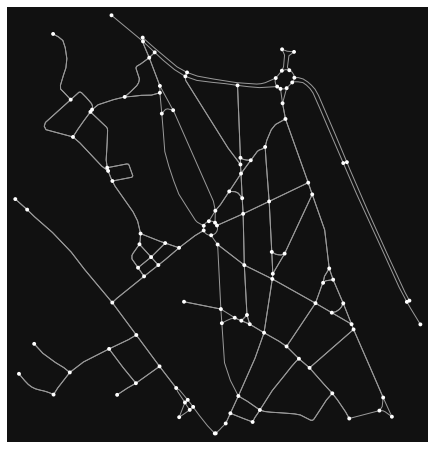

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
g = Graph(from_point=True)
g.plot(g.download()((6.6942926, -1.6233319), dist=500, network_type='drive'))